In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")


In [2]:
consumer_key = os.getenv("TWITTER_API_KEY")
consumer_secret = os.getenv("TWITTER_API_SECRET")
bearer_token = os.getenv("TWITTER_BEARER_TOKEN")
access_token = os.getenv("TWITTER_ACCESS_TOKEN")
access_secret = os.getenv("TWITTER_ACCESS_SECRET")

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)



In [4]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())


In [5]:
# Create a custom search term and define the number of tweets
search_term = "#climate+change -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]


# Analyzing Sentiments in tweets

In [6]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]


(0.03333333333333333,
 TextBlob("Leonardo DiCaprio is fighting climate change by urging his 37 million social media followers to replace meat with v"))

In [7]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]


[0.03333333333333333,
 'Leonardo DiCaprio is fighting climate change by urging his 37 million social media followers to replace meat with v']

In [8]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()


,polarity,tweet
0,0.033333,Leonardo DiCaprio is fighting climate change b...
1,0.000000,KenRoss777312 nellylomar SophiaPapadop10 Loren...
2,0.122222,Federal government announces creation of domes...
3,0.000000,If they restrict building materials that threa...
4,0.000000,Why declare brantford in a ClimateEmergency an...


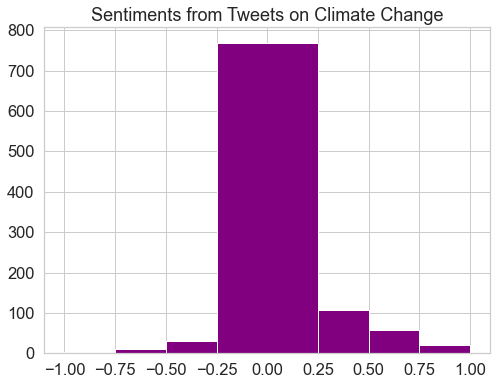

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate Change")
plt.show()


In [10]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]


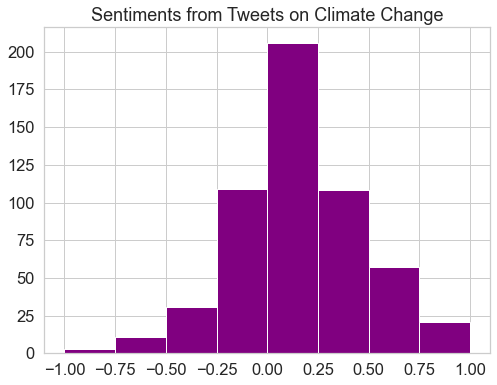

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate Change")
plt.show()


In [12]:
earch_term = "#CampFire -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-09-23').items(1000)

# Remove URLs and create textblob object for each tweet
all_tweets_no_urls = [TextBlob(remove_url(tweet.text)) for tweet in tweets]

all_tweets_no_urls[:5]

[TextBlob("Climate change and environnement are great concern for the future of mankind Shri narendramodi jis global lead"),
 TextBlob("Leonardo DiCaprio is fighting climate change by urging his 37 million social media followers to replace meat with v"),
 TextBlob("KenRoss777312 nellylomar SophiaPapadop10 LorenzoRossi29 TomZapiecki AnnaBal21262002 AponoKamsa angelikadelf"),
 TextBlob("Federal government announces creation of domestic carbon offset system to further support clean growth GHG carbon"),
 TextBlob("If they restrict building materials that threaten to flood coastal cities in California with catastrophic climate")]

In [13]:
# Calculate polarity of tweets
wild_sent_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in all_tweets_no_urls]

# Create dataframe containing polarity values and tweet text
wild_sent_df = pd.DataFrame(wild_sent_values, columns=["polarity", "tweet"])
wild_sent_df = wild_sent_df[wild_sent_df.polarity != 0]

wild_sent_df.head()


,polarity,tweet
0,0.266667,Climate change and environnement are great con...
1,0.033333,Leonardo DiCaprio is fighting climate change b...
3,0.122222,Federal government announces creation of domes...
7,0.064815,The Colombian city is planting giant corridors...
13,0.204167,BrentToderian Please note walabor more roads m...


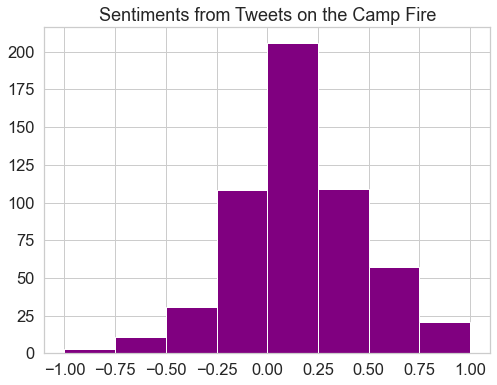

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))

wild_sent_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
        ax=ax, color="purple")

plt.title("Sentiments from Tweets on the Camp Fire")
plt.show()
